In [2]:
import os
from pathlib import Path
import zipfile
os.getcwd()
os.listdir('data')


data_dir = Path("/projectnb/ds340/projects/Fall_2025_Shaik_Wrenn_Hear_Me_Out/data")
for zip_path in data_dir.glob("*.zip"):
    extract_to = data_dir / zip_path.stem
    extract_to.mkdir(exist_ok=True)
    with zipfile.ZipFile(zip_path, "r") as z:
        z.extractall(extract_to)



In [3]:
from pathlib import Path
import librosa

data_dir = Path("/projectnb/ds340/projects/Fall_2025_Shaik_Wrenn_Hear_Me_Out/data")
wav_files = list(data_dir.rglob("*.wav"))

print(f"Found {len(wav_files)} audio files")
if wav_files:
    sample_file = wav_files[0]
    y, sr = librosa.load(sample_file, sr=None)
    print(f"Loaded: {sample_file.name}")
    print(f"Sampling rate: {sr} Hz")
else:
    print("No audio files found — check your path or extraction.")

    #referenced chatgpt 



Found 4784 audio files
Loaded: 03-01-01-01-02-01-03.wav
Sampling rate: 48000 Hz


In [4]:
import seaborn as sns 
import pandas as pd
import numpy as np 

sns.set(style="whitegrid", context="talk", palette="deep")
data_dir = Path("/projectnb/ds340/projects/Fall_2025_Shaik_Wrenn_Hear_Me_Out/data")
wav_files = list(data_dir.rglob("*.wav"))
print(f"Found {len(wav_files)} audio files total")



Found 4784 audio files total


In [5]:
def parse_ravdess_filename(file_path):
    parts = file_path.stem.split("-")
    return {
        "path": str(file_path),
        "modality": parts[0],
        "vocal_channel": parts[1],
        "emotion": parts[2],
        "intensity": parts[3],
        "statement": parts[4],
        "repetition": parts[5],
        "actor": parts[6],
    }

metadata = [parse_ravdess_filename(p) for p in wav_files]
df = pd.DataFrame(metadata)
print(df.head())


emotion_labels = {
    "01": "neutral",
    "02": "calm",
    "03": "happy",
    "04": "sad",
    "05": "angry",
    "06": "fearful",
    "07": "disgust",
    "08": "surprised"
}
df["emotion_label"] = df["emotion"].map(emotion_labels)

#based on code here: https://zenodo.org/records/1188976



                                                path modality vocal_channel  \
0  /projectnb/ds340/projects/Fall_2025_Shaik_Wren...       03            01   
1  /projectnb/ds340/projects/Fall_2025_Shaik_Wren...       03            01   
2  /projectnb/ds340/projects/Fall_2025_Shaik_Wren...       03            01   
3  /projectnb/ds340/projects/Fall_2025_Shaik_Wren...       03            01   
4  /projectnb/ds340/projects/Fall_2025_Shaik_Wren...       03            01   

  emotion intensity statement repetition actor  
0      01        01        02         01    03  
1      03        02        02         01    03  
2      07        01        02         02    03  
3      04        01        01         01    03  
4      04        01        02         02    03  


no. of unique actors: 23
no. emotions: ['neutral' 'happy' 'disgust' 'sad' 'fearful' 'surprised' 'calm' 'angry']


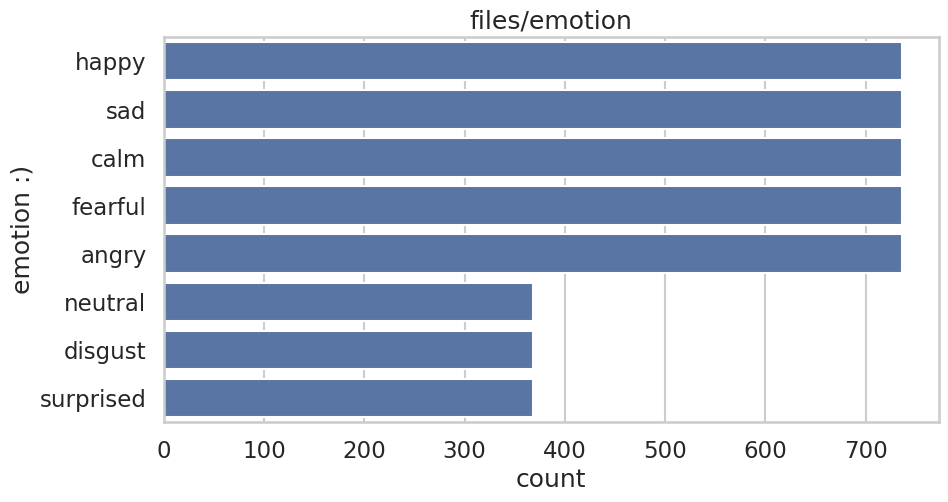

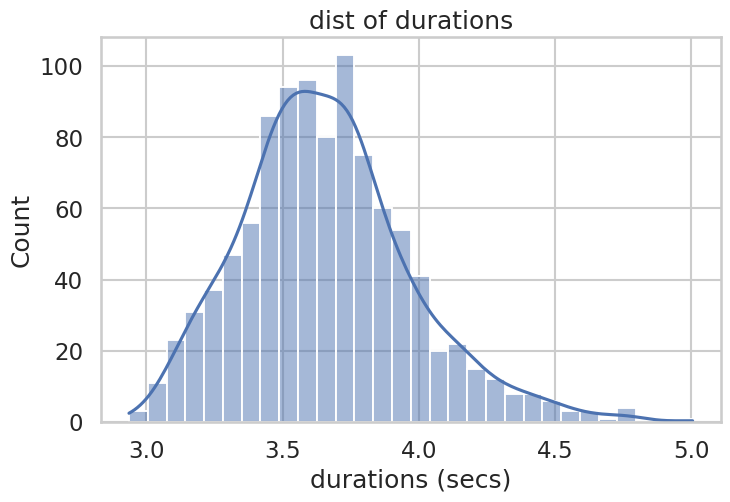

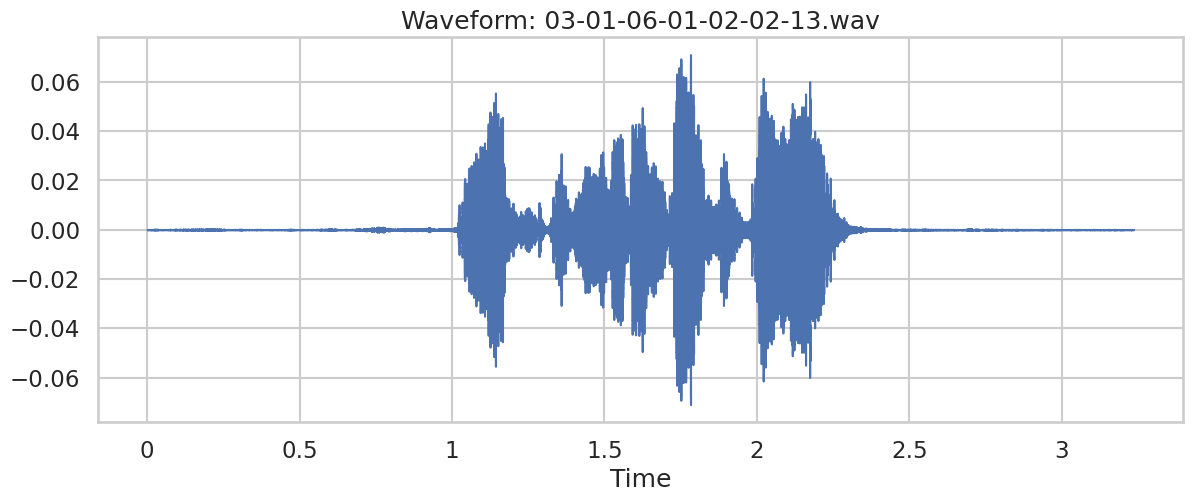

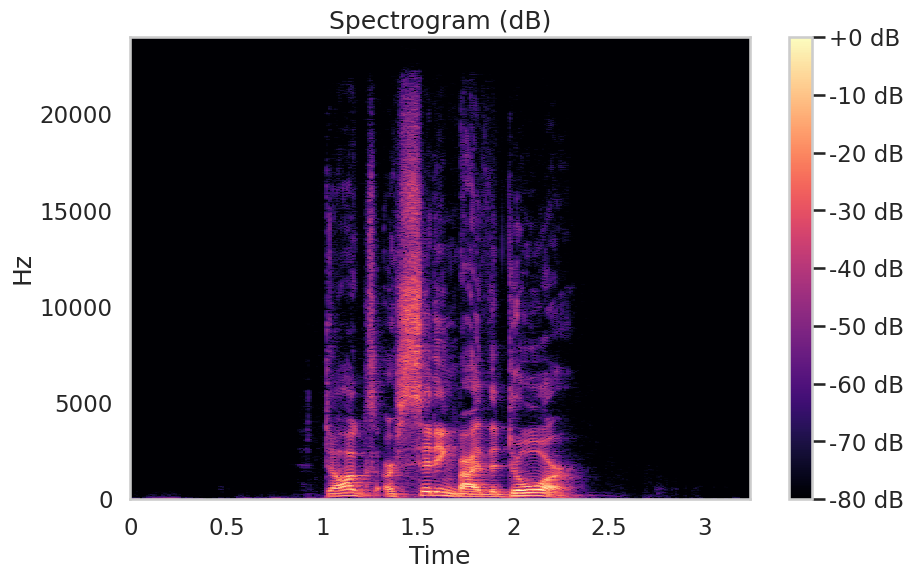

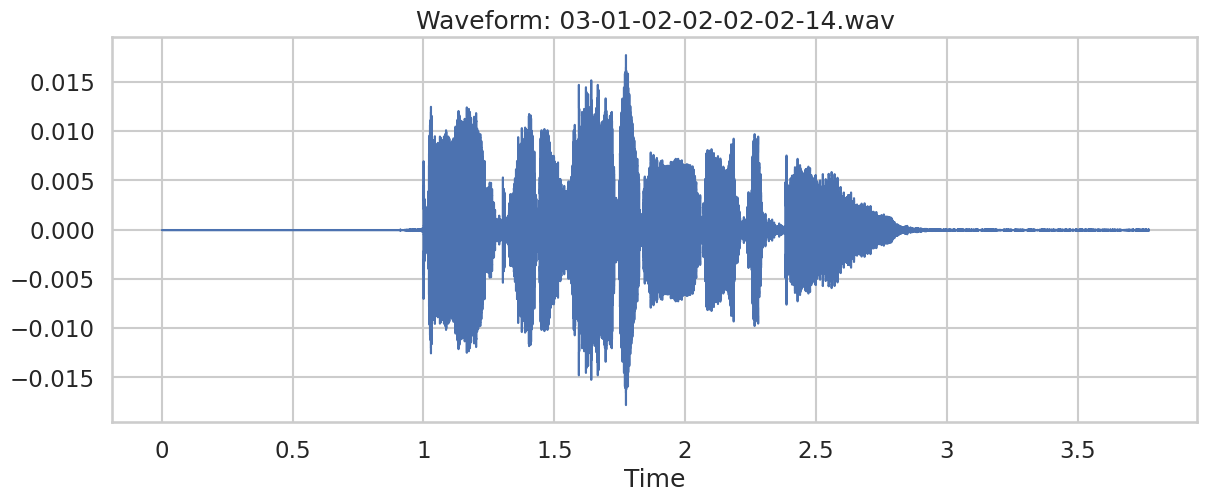

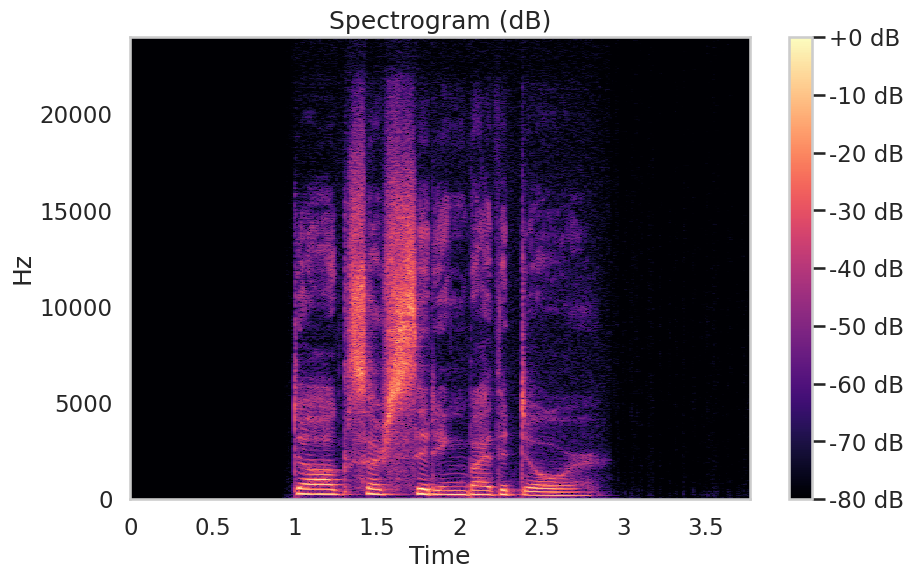

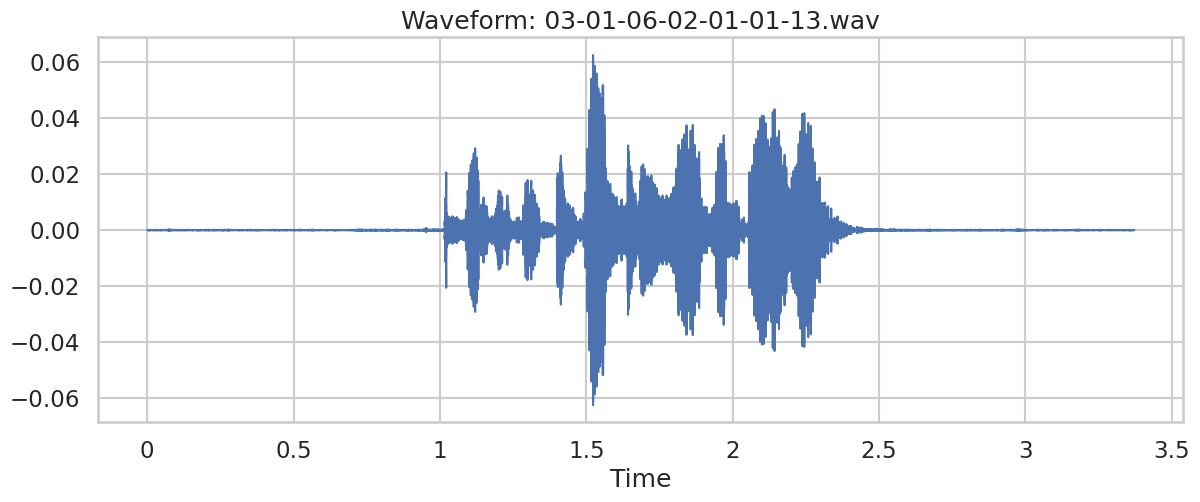

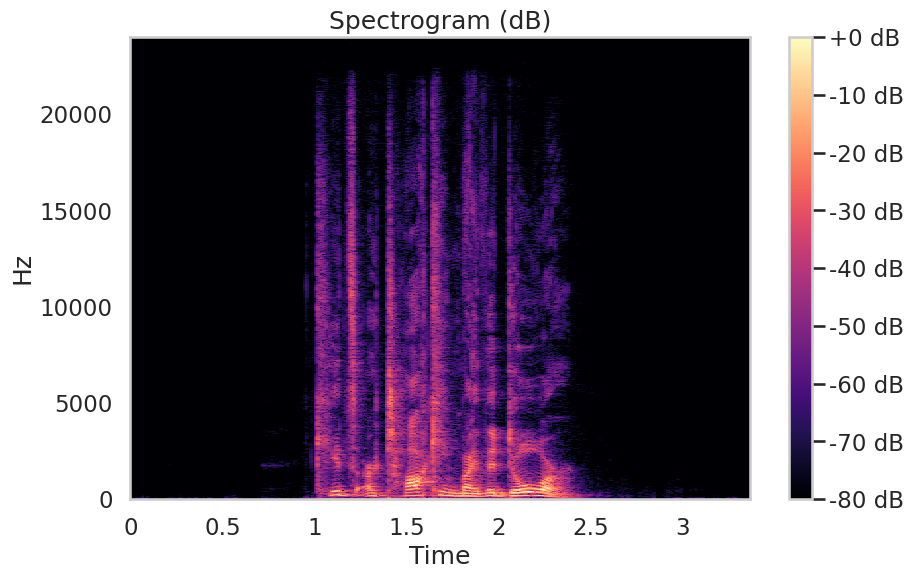

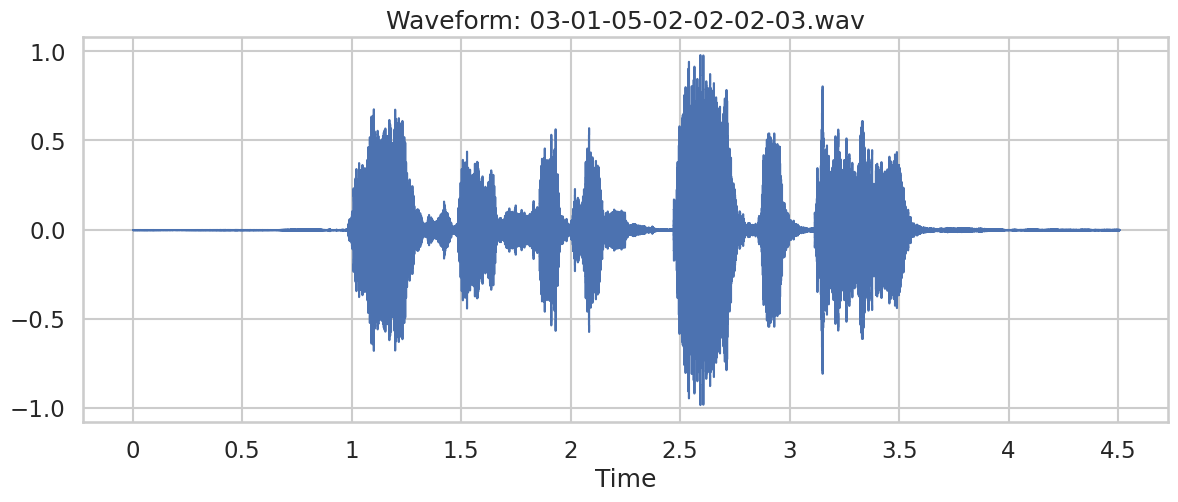

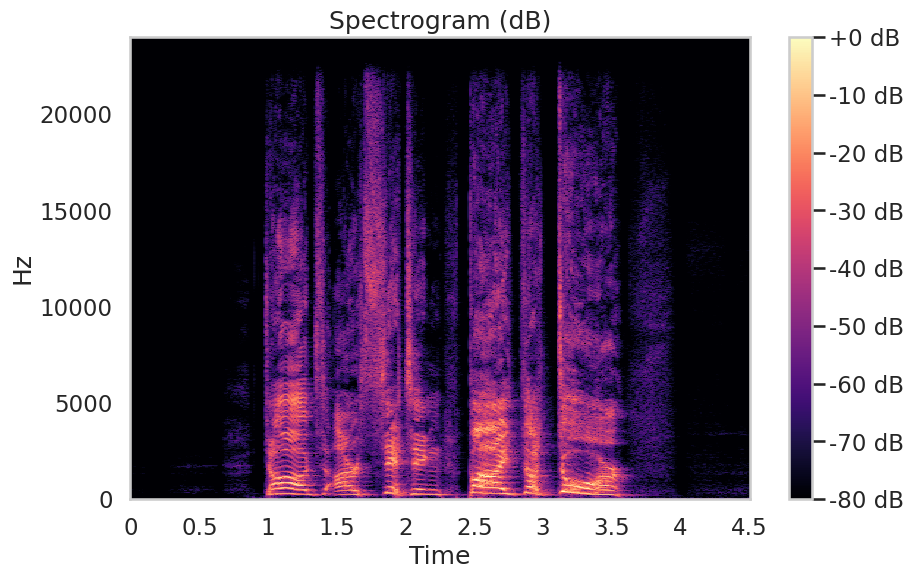

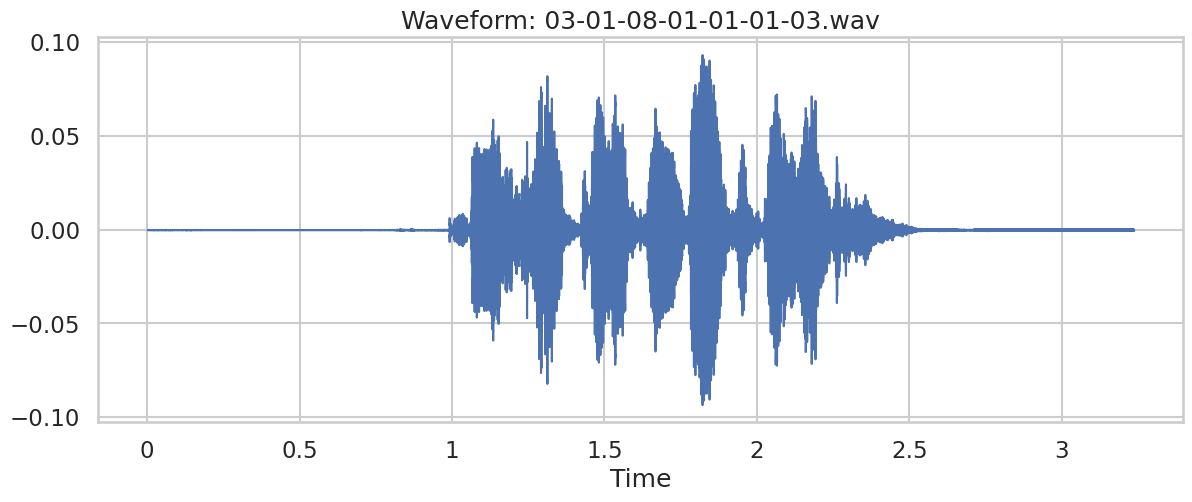

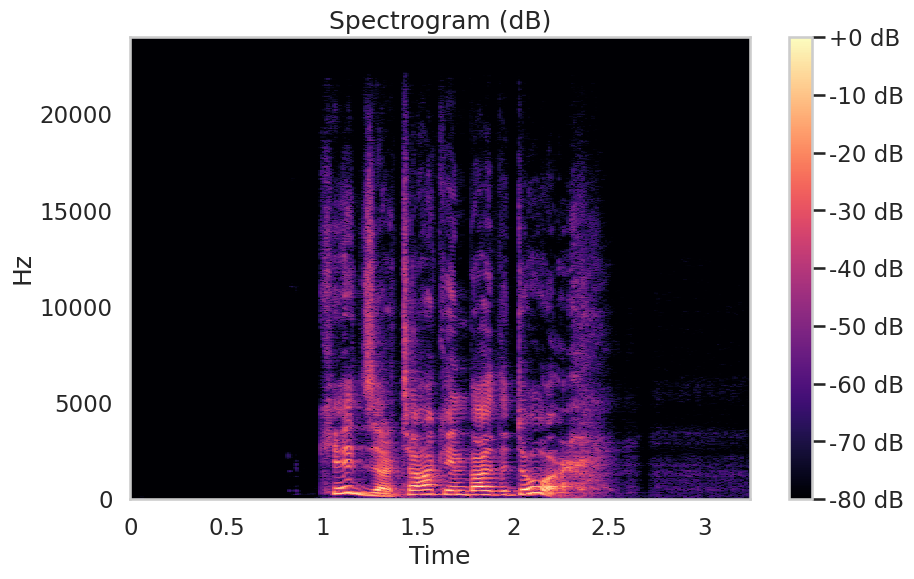

In [6]:
import matplotlib.pyplot as plt

print("no. of unique actors:", df["actor"].nunique())
print("no. emotions:", df["emotion_label"].unique())

plt.figure(figsize=(10,5))
sns.countplot(y="emotion_label", data=df, order=df["emotion_label"].value_counts().index)
plt.title("files/emotion")
plt.xlabel("count")
plt.ylabel("emotion :)")
plt.show()


durations = []
for speed in wav_files[:1000]: #arb number 
    y, sr = librosa.load(speed, sr=None)
    durations.append(len(y) / sr)

plt.figure(figsize=(8,5))
sns.histplot(durations, bins=30, kde=True)
plt.xlabel("durations (secs)")
plt.title("dist of durations")
plt.show()

import random
nums = [random.randint(1, 500) for x in range(5)]
#print(nums)

for i in nums:
    sample = wav_files[i]
    y, sr = librosa.load(sample, sr=None)

    plt.figure(figsize=(14,5))
    librosa.display.waveshow(y, sr=sr)
    plt.title(f"Waveform: {Path(sample).name}")
    plt.show()

    # Spectrogram
    plt.figure(figsize=(10,6))
    spec = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
    librosa.display.specshow(spec, sr=sr, x_axis='time', y_axis='hz', cmap='magma')
    plt.title("Spectrogram (dB)")
    plt.colorbar(format="%+2.0f dB")
    plt.show()